In [472]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [473]:
# 导入数据
filename = 'data/ElectricCar.csv'
# 设置列名
# names = ['year', '充电桩数量', '充电成本', '专利数','生产量', '人均收入', '政策','企业注册量','燃料电池销售量','保有量']
# names = ['year', '充电桩数量', '充电成本', '专利数','生产量', '人均收入', '政策','企业注册量','燃料电池销售量','发展得分']
names = ['year', 'Number of Charging Stations', 'Charging Costs', 'Number of Patents', 'Production Quantity', 'Per Capita Income', 
         'Government Policies', 'Number of Registered Companies', 'Sales Volume of Fuel Cells', 'Development Score']
# 读取CSV文件
data = pd.read_csv(filename, names=names, skiprows=1)

print(data.shape)
print(data.head(12))

(12, 10)
    year  Number of Charging Stations  Charging Costs  Number of Patents  \
0   2011                       0.0076             1.3                883   
1   2012                       0.8281             1.3               1344   
2   2013                       1.9000             1.2               2024   
3   2014                       2.8000             1.1               3111   
4   2015                       4.9000             1.0               4566   
5   2016                      14.1200             0.9               8205   
6   2017                      44.0000             0.8              12262   
7   2018                      77.7000             0.7              17647   
8   2019                     121.9000             0.6              18498   
9   2020                     168.1000             0.5              19739   
10  2021                     261.7000             0.4              21300   
11  2022                     520.9000             0.4              24700   

  

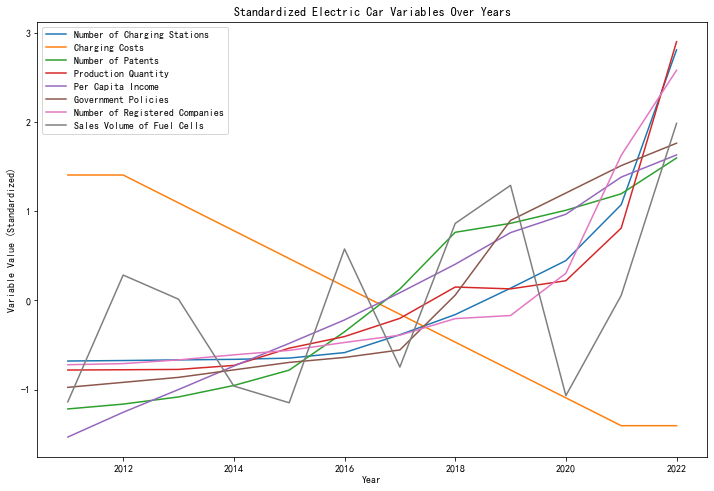

In [474]:
# 选择需要标准化的列
# columns_to_standardize = ['充电桩数量', '充电成本', '专利数','生产量', '人均收入', '政策','企业注册量','燃料电池销售量','保有量']
columns_to_standardize = ['Number of Charging Stations', 'Charging Costs', 'Number of Patents', 'Production Quantity', 'Per Capita Income', 
         'Government Policies', 'Number of Registered Companies', 'Sales Volume of Fuel Cells']

# 使用标准化器
scaler = StandardScaler()

# 对选择的列进行标准化
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# 绘制标准化后的数据
plt.figure(figsize=(12, 8))

for column in columns_to_standardize:
    plt.plot(data['year'], data[column], label=column)

plt.title('Standardized Electric Car Variables Over Years')
plt.xlabel('Year')
plt.ylabel('Variable Value (Standardized)')

plt.legend()
plt.show()

In [475]:
# 导入数据
filename = 'data/ElectricCar.csv'
# 设置列名
# names = ['year', '充电桩数量', '充电成本', '专利数','生产量', '人均收入', '政策','企业注册量','燃料电池销售量','保有量']
names = ['year', 'Number of Charging Stations', 'Charging Costs', 'Number of Patents', 'Production Quantity', 'Per Capita Income', 
         'Government Policies', 'Number of Registered Companies', 'Sales Volume of Fuel Cells', 'Development Score']
# 读取CSV文件
data = pd.read_csv(filename, names=names, skiprows=1)

print(data.shape)
print(data.head(12))
print(data.corr())
print(data)

(12, 10)
    year  Number of Charging Stations  Charging Costs  Number of Patents  \
0   2011                       0.0076             1.3                883   
1   2012                       0.8281             1.3               1344   
2   2013                       1.9000             1.2               2024   
3   2014                       2.8000             1.1               3111   
4   2015                       4.9000             1.0               4566   
5   2016                      14.1200             0.9               8205   
6   2017                      44.0000             0.8              12262   
7   2018                      77.7000             0.7              17647   
8   2019                     121.9000             0.6              18498   
9   2020                     168.1000             0.5              19739   
10  2021                     261.7000             0.4              21300   
11  2022                     520.9000             0.4              24700   

  

In [476]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            12 non-null     int64  
 1   Number of Charging Stations     12 non-null     float64
 2   Charging Costs                  12 non-null     float64
 3   Number of Patents               12 non-null     int64  
 4   Production Quantity             12 non-null     float64
 5   Per Capita Income               12 non-null     int64  
 6   Government Policies             12 non-null     int64  
 7   Number of Registered Companies  12 non-null     float64
 8   Sales Volume of Fuel Cells      12 non-null     int64  
 9   Development Score               12 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 1.1 KB
None
              year  Number of Charging Stations  Charging Costs  \
count    12.000000                    12.00

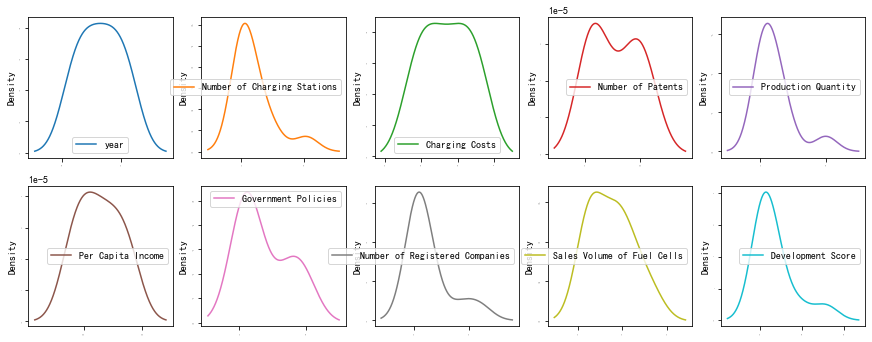

In [477]:
# 数据可视化
data.plot(kind='density', figsize=(15,15), subplots=True, layout=(5, 5), sharex=False, fontsize=1)
plt.show()

                                    year  Number of Charging Stations  \
year                            1.000000                     0.815515   
Number of Charging Stations     0.815515                     1.000000   
Charging Costs                 -0.995299                    -0.788485   
Number of Patents               0.978233                     0.820551   
Production Quantity             0.824567                     0.985865   
Per Capita Income               0.998759                     0.832272   
Government Policies             0.931701                     0.886598   
Number of Registered Companies  0.814760                     0.979130   
Sales Volume of Fuel Cells      0.491091                     0.591798   
Development Score               0.832747                     0.993300   

                                Charging Costs  Number of Patents  \
year                                 -0.995299           0.978233   
Number of Charging Stations          -0.788485           0

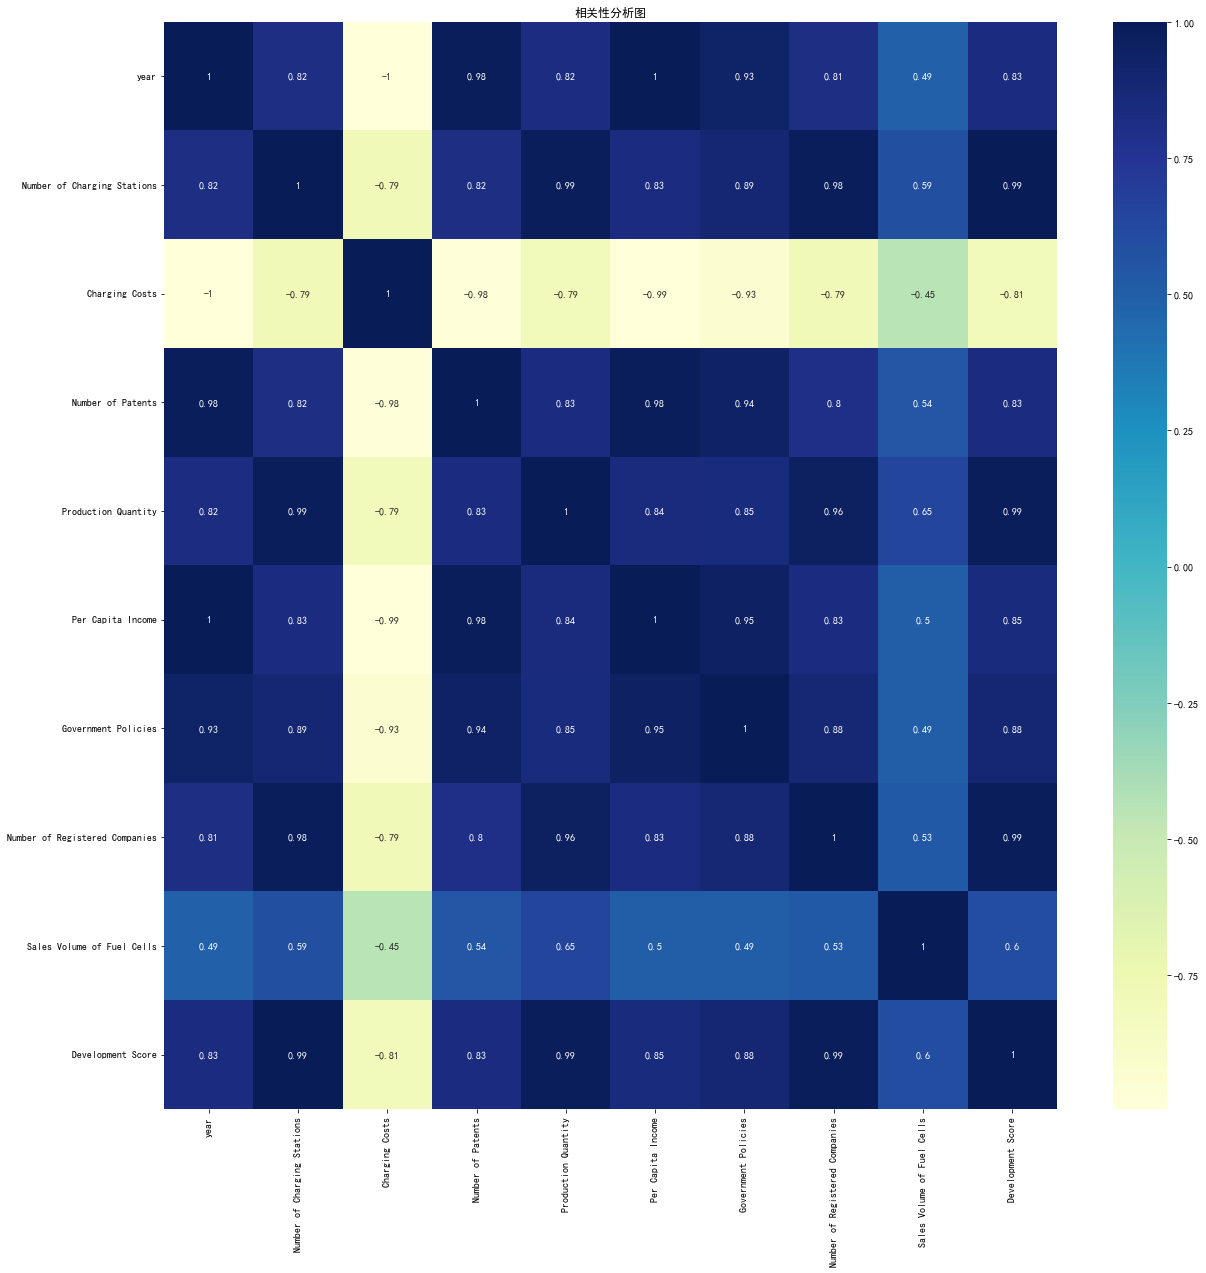

In [478]:
print(data.corr())
# 相关性热度图-皮尔逊相关系数
plt.figure(figsize=(20, 20))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.title("相关性分析图")
plt.show()

# columns_to_standardize = ['Number of Charging Stations', 'Charging Costs', 'Number of Patents', 'Production Quantity', 'Per Capita Income', 
#          'Government Policies', 'Number of Registered Companies', 'Sales Volume of Fuel Cells']

# # 使用标准化器
# scaler = StandardScaler()

# print(data)

# # 对选择的列进行标准化
# data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# print(data)

# # 相关性热度图-皮尔逊相关系数
# plt.figure(figsize=(20, 20))
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# plt.title("相关性分析图")
# plt.show()


In [479]:
print(data)
data = data.drop(['year','Sales Volume of Fuel Cells'],axis = 1)
print(data)

# 数据准备
X = data.iloc[:, 0:7].values
Y = data.iloc[:, 7:].values
print(X)
print(Y)

    year  Number of Charging Stations  Charging Costs  Number of Patents  \
0   2011                       0.0076             1.3                883   
1   2012                       0.8281             1.3               1344   
2   2013                       1.9000             1.2               2024   
3   2014                       2.8000             1.1               3111   
4   2015                       4.9000             1.0               4566   
5   2016                      14.1200             0.9               8205   
6   2017                      44.0000             0.8              12262   
7   2018                      77.7000             0.7              17647   
8   2019                     121.9000             0.6              18498   
9   2020                     168.1000             0.5              19739   
10  2021                     261.7000             0.4              21300   
11  2022                     520.9000             0.4              24700   

    Product

In [480]:
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [481]:
# 标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Y_train_scaled = scaler.fit_transform(Y_train)
# Y_test_scaled = scaler.fit_transform(Y_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.52042465  0.07124705 -0.25944241 -0.35345882 -0.13335564 -0.56460588
  -0.39307329]
 [-0.60850207  1.35369395 -1.13786485 -0.69725873 -1.457075   -0.90149779
  -0.6453628 ]
 [-0.60338122  1.35369395 -1.08255855 -0.69441964 -1.17733754 -0.84534914
  -0.63274832]
 [ 2.64245887 -1.53181157  1.71946748  2.67692854  1.73184633  1.84978611
   2.69326839]
 [ 0.15224512 -0.89058812  0.97541176  0.13662167  0.85365064  0.97948202
  -0.08752266]
 [-0.59107432  0.7124705  -0.87057105 -0.64987302 -0.6551324  -0.70497751
  -0.53323413]
 [-0.33393947 -0.24936467  0.22727704 -0.16621427  0.17408425 -0.4803829
  -0.31037839]
 [ 0.44058566 -1.21119985  1.12429488  0.22044234  1.06156168  1.2882996
   0.39182741]
 [-0.57796793  0.39185877 -0.69601429 -0.47276807 -0.39824231 -0.62075453
  -0.48277622]]
[[-0.12361314 -0.5699764   0.87331704  0.15554892  0.49594654  0.13725226
  -0.12256287]
 [ 1.0247561  -1.53181157  1.3115685   0.76122081  1.48123926  1.59711718
   1.72896182]
 [-0.59669134  1.03308

系数： [-0.02624563  0.00915644  0.00527758  0.10484835 -0.00777705  0.01738091
  0.03289783]
特征排序： Index(['Production Quantity', 'Number of Registered Companies',
       'Government Policies', 'Charging Costs', 'Number of Patents',
       'Per Capita Income', 'Number of Charging Stations'],
      dtype='object')


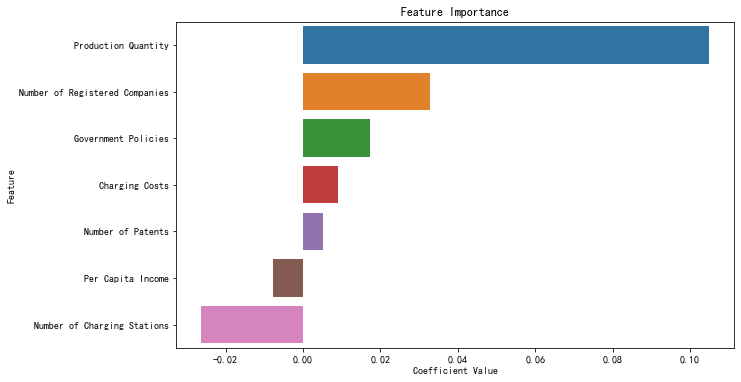

In [482]:
# # 这个部分查看特征的重要性
# modelLR = LinearRegression()
# # 训练模型
# modelLR.fit(X_train_scaled, Y_train_scaled)
# # 获取特征标签和系数
# feat_labels = data.columns[:-1]
# coefficients = modelLR.coef_

# # 打印特征系数
# print("系数：", coefficients)

# # 对系数排序，针对每个目标变量
# for i in range(Y_train_scaled.shape[1]):
#     print(f"\n目标变量 {i + 1}")
#     indices = np.argsort(coefficients[i])[::-1]

#     # 初始化存储特征和系数的列表
#     label_name = []
#     coeffs = []

#     # 打印排序后的特征系数
#     for f in range(X_train_scaled.shape[1]):
#         print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], coefficients[i, indices[f]]))
#         label_name.append(feat_labels[indices[f]])
#         coeffs.append(coefficients[i, indices[f]])

#     # 可以选择绘制每个目标变量的条形图
#     a = pd.DataFrame({"feature": label_name})
#     b = pd.DataFrame({"coefficient": coeffs})
#     df = pd.concat([a, b], axis=1)

#     sns.barplot(x="coefficient", y="feature", data=df, order=df["feature"], orient="h")
#     plt.show()

    
# 创建多线性回归模型
modelLR = LinearRegression()

# 拟合模型
# modelLR.fit(X_train_scaled, Y_train)
modelLR.fit(X_train_scaled, Y_train)

# 获取特征标签和系数
feat_labels = data.columns[0:8]
coefficients = modelLR.coef_[0]  # Access the coefficients for the first (and only) target variable

# 打印特征系数
print("系数：", coefficients)

# 输出特征排序
indices = np.argsort(coefficients)[::-1]
print("特征排序：", feat_labels[indices])

# 绘制特征重要性的条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients[indices], y=feat_labels[indices], orient="h")
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

[[ 0.08981769]
 [ 0.19530989]
 [-0.00223783]]
[[0.078]
 [0.23 ]
 [0.001]]
保有量:
MSE: 0.0004511817851570348
RMSE: 0.021241040114764503
MAE: 0.01658187789086477
权重：[[-0.02624563  0.00915644  0.00527758  0.10484835 -0.00777705  0.01738091
   0.03289783]]


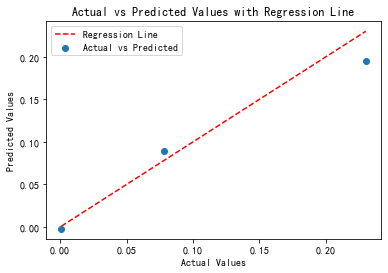

In [502]:
# # 创建多线性回归模型
# model = LinearRegression()

# # 拟合模型
# res = model.fit(X_train_scaled, Y_train_scaled)

# # 在测试集上进行预测
# Y_pred = model.predict(X_test_scaled)
# print(Y_pred)
# print(Y_test_scaled)
# # 假设 Y_test 和 Y_pred 分别是你的实际值和预测值的矩阵，每一列对应一个目标
# # 例如，如果有三个目标，那么 Y_test 和 Y_pred 的形状可能是 (样本数, 3)

# # 初始化误差列表
# mse_list = []
# rmse_list = []
# mae_list = []

# # 遍历每个目标
# for i in range(Y_test_scaled.shape[1]):
#     # 计算均方误差
#     mse = mean_squared_error(Y_test_scaled[:, i], Y_pred[:, i])
#     mse_list.append(mse)

#     # 计算均方根误差
#     rmse = math.sqrt(mse)
#     rmse_list.append(rmse)

#     # 计算平均绝对误差
#     mae = mean_absolute_error(Y_test_scaled[:, i], Y_pred[:, i])
#     mae_list.append(mae)

#     # 打印每个目标的误差
#     print(f'Target {i+1}:')
#     print(f'MSE: {mse}')
#     print(f'RMSE: {rmse}')
#     print(f'MAE: {mae}')
#     print()

# # 打印平均误差（如果需要）
# print('Average across targets:')
# print(f'Mean MSE: {np.mean(mse_list)}')
# print(f'Mean RMSE: {np.mean(rmse_list)}')
# print(f'Mean MAE: {np.mean(mae_list)}')
# 创建多线性回归模型
model = LinearRegression()

# 拟合模型
res = model.fit(X_train_scaled, Y_train)

# 在测试集上进行预测
Y_pred = model.predict(X_test_scaled)
print(Y_pred)
print(Y_test)

mse = mean_squared_error(Y_test, Y_pred)

# 计算均方根误差
rmse = math.sqrt(mse)

# 计算平均绝对误差
mae = mean_absolute_error(Y_test, Y_pred)

coefficients = model.coef_

# 打印每个目标的误差
print(f'保有量:')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'权重：{coefficients}')

# Plotting the actual values vs. predicted values with regression line
plt.scatter(Y_test, Y_pred, label='Actual vs Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')
plt.legend()
plt.show()

In [484]:
import statsmodels.api as sm

# 对每个Y变量分别添加截距项
X_train_scaled_with_intercept = sm.add_constant(X_train_scaled)

# 创建三个OLS模型，分别对应三个Y变量
model1_sm = sm.OLS(Y_train, X_train_scaled_with_intercept)
result1 = model1_sm.fit()

# 打印每个模型的摘要
print("Model 1 Summary:")
print(result1.summary())


Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.308e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):            0.00673
Time:                        02:23:11   Log-Likelihood:                 57.944
No. Observations:                   9   AIC:                            -99.89
Df Residuals:                       1   BIC:                            -98.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0764      0.000   

C:\py\anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [310]:
# 导入数据
filename = 'data/ElectricCar.csv'
# 设置列名
names = ['year', 'CP', 'Policies', 'PCDI', 
         'NWPA', 'CpKE','RQNEVE','PQNEVE','SQ','IQ','PRNEV']
# 读取CSV文件
data2 = pd.read_csv(filename, names=names, skiprows=1)

print(data2.shape)
print(data2.head(12))

(12, 11)
    year        CP  Policies   PCDI      NWPA   CpKE  RQNEVE  PQNEVE    SQ  \
0   2011    0.0076       1.3    883    0.8400  14551       3    0.12   435   
1   2012    0.8281       1.3   1344    1.2600  16510       5    0.21  1770   
2   2013    1.9000       1.2   2024    1.7533  18311       7    0.51  1516   
3   2014    2.8000       1.1   3111    7.8500  20167      10    0.92   601   
4   2015    4.9000       1.0   4566   34.0500  21966      13    1.28   425   
5   2016   14.1200       0.9   8205   51.7000  23821      15    1.92  2045   
6   2017   44.0000       0.8  12262   79.4000  25974      18    2.51   801   
7   2018   77.7000       0.7  17647  127.0000  28228      40    3.85  2314   
8   2019  121.9000       0.6  18498  124.2000  30733      70    4.10  2715   
9   2020  168.1000       0.5  19739  136.6000  32189      81    7.52   500   
10  2021  261.7000       0.4  21300  216.6000  35128      92   17.06  1556   
11  2022  520.9000       0.4  24700  500.0000  36883   

In [311]:
data2 = data2.drop(['year','CP','CpKE','PCDI','SQ','PRNEV'], axis=1)
print(data2)

    Policies      NWPA  RQNEVE  PQNEVE       IQ
0        1.3    0.8400       3    0.12     0.70
1        1.3    1.2600       5    0.21     1.10
2        1.2    1.7533       7    0.51     3.00
3        1.1    7.8500      10    0.92    12.00
4        1.0   34.0500      13    1.28    42.00
5        0.9   51.7000      15    1.92    91.28
6        0.8   79.4000      18    2.51   153.40
7        0.7  127.0000      40    3.85   260.78
8        0.6  124.2000      70    4.10   380.87
9        0.5  136.6000      81    7.52   492.02
10       0.4  216.6000      92   17.06   784.00
11       0.4  500.0000     101   23.94  1310.00


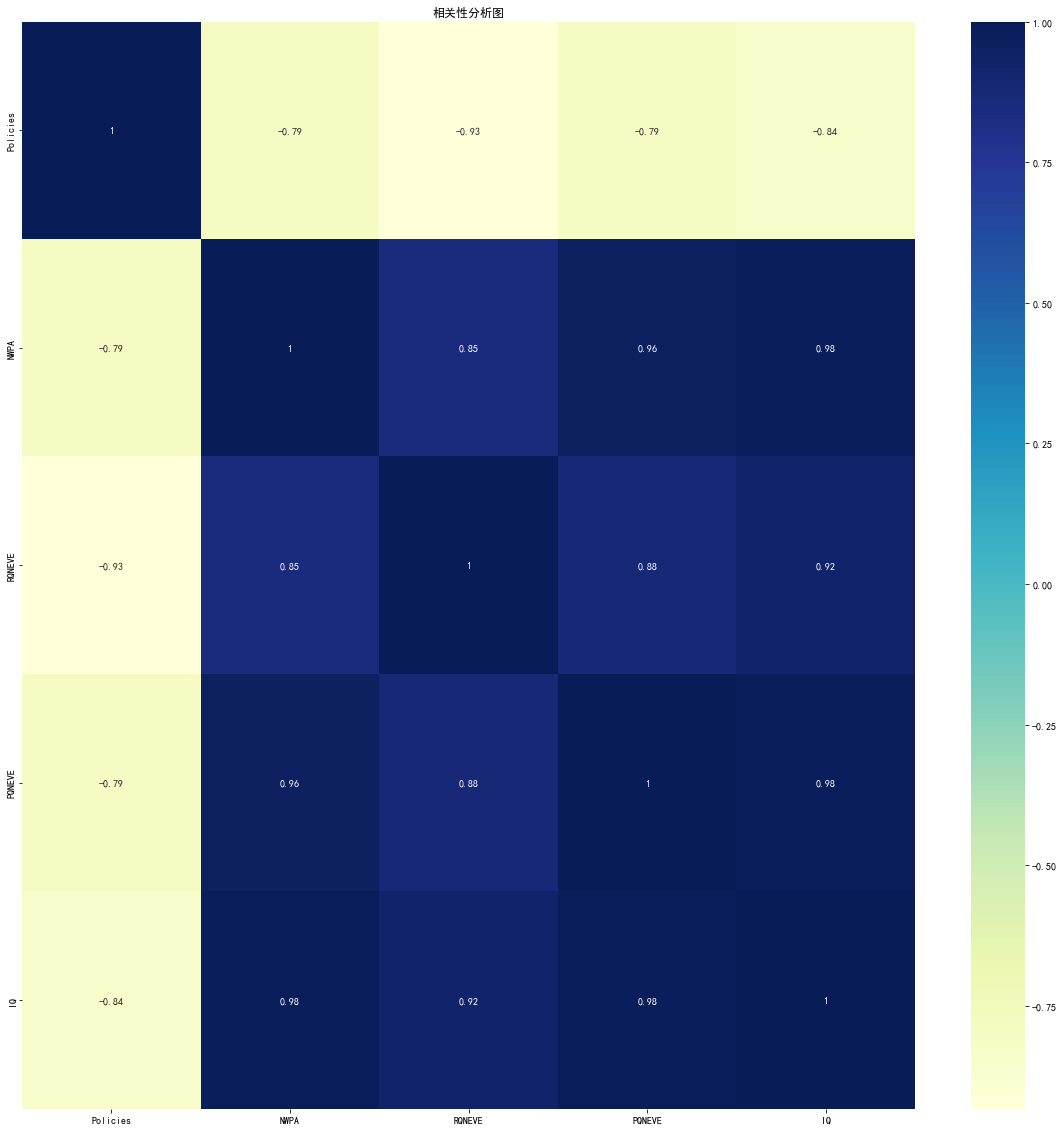

          Policies      NWPA    RQNEVE    PQNEVE        IQ
Policies  1.000000 -0.793240 -0.933334 -0.792558 -0.838419
NWPA     -0.793240  1.000000  0.848915  0.955625  0.979590
RQNEVE   -0.933334  0.848915  1.000000  0.877190  0.920587
PQNEVE   -0.792558  0.955625  0.877190  1.000000  0.984068
IQ       -0.838419  0.979590  0.920587  0.984068  1.000000


In [312]:
# 相关性热度图-皮尔逊相关系数
plt.figure(figsize=(20, 20))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)
plt.title("相关性分析图")
plt.show()
print(data2.corr())

In [313]:
# 数据准备
X2 = data2.iloc[:, 0:4].values
Y2 = data2.iloc[:, 4:].values
print(X2)
print(Y2)

[[1.3000e+00 8.4000e-01 3.0000e+00 1.2000e-01]
 [1.3000e+00 1.2600e+00 5.0000e+00 2.1000e-01]
 [1.2000e+00 1.7533e+00 7.0000e+00 5.1000e-01]
 [1.1000e+00 7.8500e+00 1.0000e+01 9.2000e-01]
 [1.0000e+00 3.4050e+01 1.3000e+01 1.2800e+00]
 [9.0000e-01 5.1700e+01 1.5000e+01 1.9200e+00]
 [8.0000e-01 7.9400e+01 1.8000e+01 2.5100e+00]
 [7.0000e-01 1.2700e+02 4.0000e+01 3.8500e+00]
 [6.0000e-01 1.2420e+02 7.0000e+01 4.1000e+00]
 [5.0000e-01 1.3660e+02 8.1000e+01 7.5200e+00]
 [4.0000e-01 2.1660e+02 9.2000e+01 1.7060e+01]
 [4.0000e-01 5.0000e+02 1.0100e+02 2.3940e+01]]
[[7.0000e-01]
 [1.1000e+00]
 [3.0000e+00]
 [1.2000e+01]
 [4.2000e+01]
 [9.1280e+01]
 [1.5340e+02]
 [2.6078e+02]
 [3.8087e+02]
 [4.9202e+02]
 [7.8400e+02]
 [1.3100e+03]]


In [314]:
validation_size = 0.2
seed = 7
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=validation_size, random_state=seed)

In [315]:
# 标准化数据
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
# Y_train_scaled2 = scaler.fit_transform(Y_train2)
# Y_test_scaled2 = scaler.fit_transform(Y_test2)
print(X_train_scaled2)
print(X_test_scaled2)

[[ 0.07124705 -0.35345882 -0.56460588 -0.39307329]
 [ 1.35369395 -0.69725873 -0.90149779 -0.6453628 ]
 [ 1.35369395 -0.69441964 -0.84534914 -0.63274832]
 [-1.53181157  2.67692854  1.84978611  2.69326839]
 [-0.89058812  0.13662167  0.97948202 -0.08752266]
 [ 0.7124705  -0.64987302 -0.70497751 -0.53323413]
 [-0.24936467 -0.16621427 -0.4803829  -0.31037839]
 [-1.21119985  0.22044234  1.2882996   0.39182741]
 [ 0.39185877 -0.47276807 -0.62075453 -0.48277622]]
[[-0.5699764   0.15554892  0.13725226 -0.12256287]
 [-1.53181157  0.76122081  1.59711718  1.72896182]
 [ 1.03308222 -0.69108507 -0.78920048 -0.59070007]]


In [316]:
# 创建多线性回归模型
model = LinearRegression()

# 拟合模型
res = model.fit(X_train_scaled2, Y_train2)

# 在测试集上进行预测
Y_pred2 = model.predict(X_test_scaled2)
print(Y_pred2)
print(Y_test2)
# 假设 Y_test 和 Y_pred 分别是你的实际值和预测值的矩阵，每一列对应一个目标
# 例如，如果有三个目标，那么 Y_test 和 Y_pred 的形状可能是 (样本数, 3)

mse = mean_squared_error(Y_test2, Y_pred2)
mse_list.append(mse)

# 计算均方根误差
rmse = math.sqrt(mse)
rmse_list.append(rmse)

# 计算平均绝对误差
mae = mean_absolute_error(Y_test2, Y_pred2)
mae_list.append(mae)

coefficients = model.coef_

# 打印每个目标的误差
print(f'保有量:')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'权重：{coefficients}')

[[292.09048705]
 [782.36642559]
 [  2.3809517 ]]
[[260.78]
 [784.  ]
 [  3.  ]]
保有量:
MSE: 327.79946171611164
RMSE: 18.105232992593926
MAE: 11.187703252341029
权重：[[ 29.66757577 199.96544348 120.9623545  119.42001743]]


系数： [ 29.66757577 199.96544348 120.9623545  119.42001743]
特征排序： Index(['Number of Patents', 'Production Quantity', 'Per Capita Income',
       'Charging Costs'],
      dtype='object')


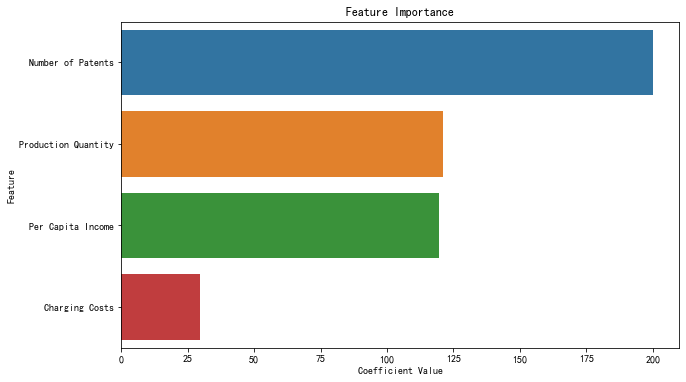

In [317]:
# 创建多线性回归模型
modelLR = LinearRegression()

# 拟合模型
modelLR.fit(X_train_scaled2, Y_train2)

# 获取特征标签和系数
feat_labels = data.columns[1:-1]
coefficients = modelLR.coef_[0]  # Access the coefficients for the first (and only) target variable

# 打印特征系数
print("系数：", coefficients)

# 输出特征排序
indices = np.argsort(coefficients)[::-1]
print("特征排序：", feat_labels[indices])

# 绘制特征重要性的条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients[indices], y=feat_labels[indices], orient="h")
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [318]:
# 例如，假设在读取数据时已经保留了列名
data = pd.read_csv('data/ElectricCar.csv')

# 提取特征和目标变量
X = data.iloc[:, 1:-1]  # 假设特征在第2列到倒数第2列
y = data['Penetration Rate of New Energy Vehicles']

# 划分训练集和测试集
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train2.columns
vif_data["VIF"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]

print(vif_data)


KeyError: 'Penetration Rate of New Energy Vehicles'

In [319]:

# # # 创建未来年份的数据集，示例中特征按一定比例递增
# # future_years = np.arange(2023, 2033).reshape(-1, 1)  # 从2023年到2032年

# # # 设置其他特征的增长趋势
# # future_data = pd.DataFrame({
# #     'year': future_years.flatten(),
# #     'CPQ': np.arange(520, 1520, 100),  # 示例中充电桩数量每年增加10
# #     'NEVP': np.arange(300, 1000, 70),  # 示例中新能源汽车生产量每年增加10
# #     'RQNEVE': np.arange(24, 64, 4),    # 示例中新能源汽车企业注册量每年增加1
# # })

# # # 对未来年份的特征进行标准化（使用之前的 StandardScaler）
# # future_data_scaled = scaler.transform(future_data.iloc[:, 1:].values)

# # # 使用你的模型进行预测
# # future_sales_predictions = model.predict(future_data_scaled)

# # # 打印预测结果
# # print("未来年份:", future_data['year'].values)
# # # print("预测销售量:", future_sales_predictions
# # 将未来预测结果组成一个 DataFrame
# future_result_df = pd.DataFrame({
# #     'Year': future_data['year'].values,
#     'Predicted_Sales': future_sales_predictions
# })

# # 保存到 CSV 文件
# future_result_df.to_csv('future_sales_predictions.csv', index=False)

<Figure size 1440x1440 with 0 Axes>

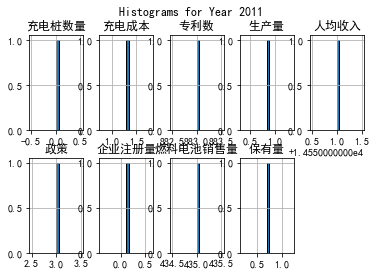

C:\py\anaconda\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\py\anaconda\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


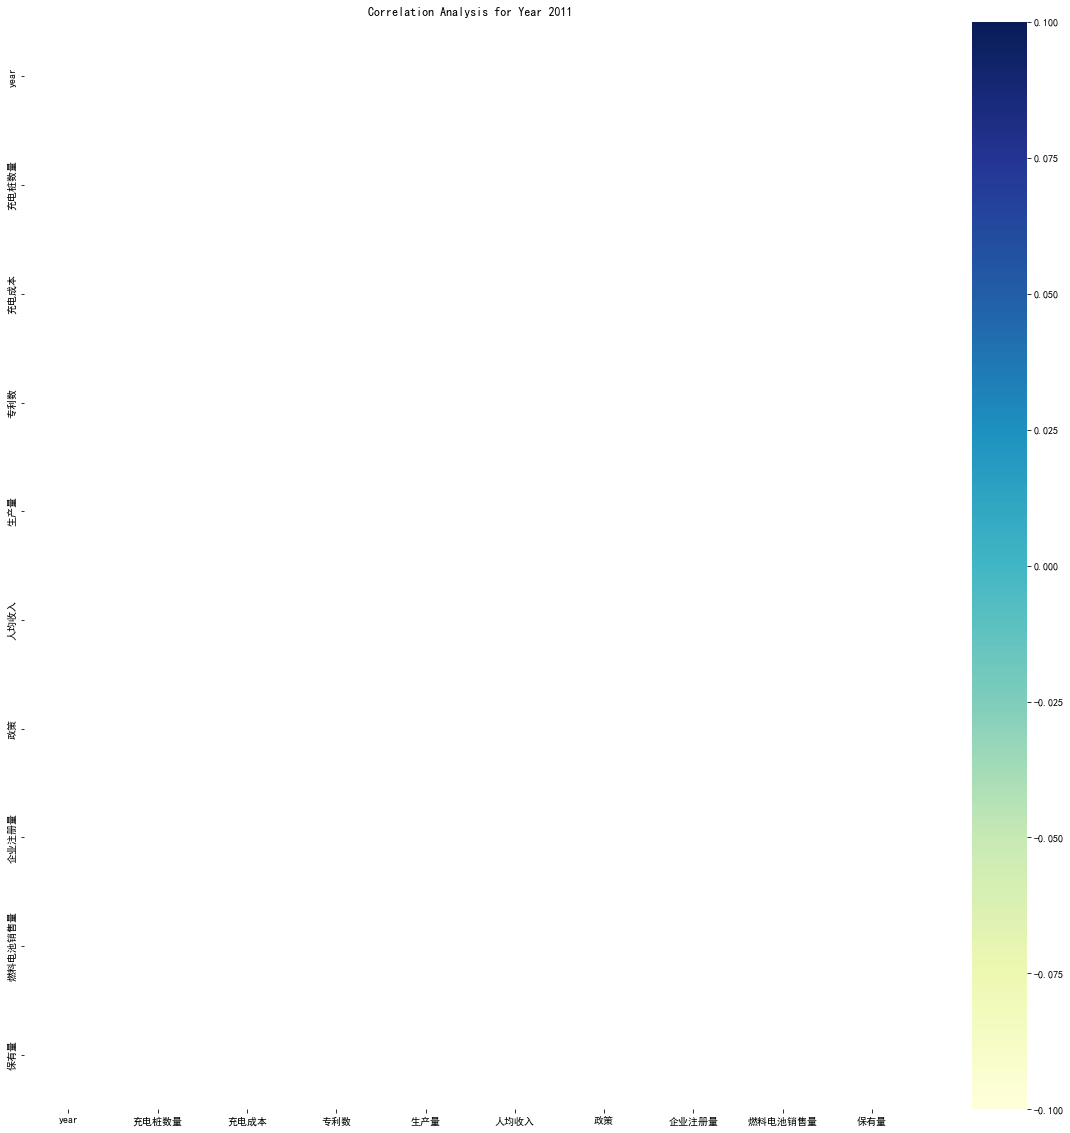

Not enough data for Year 2011. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

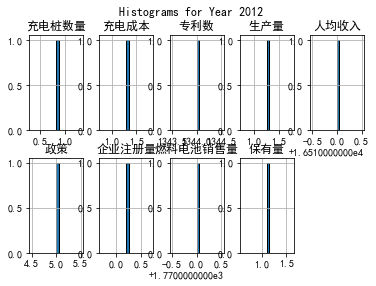

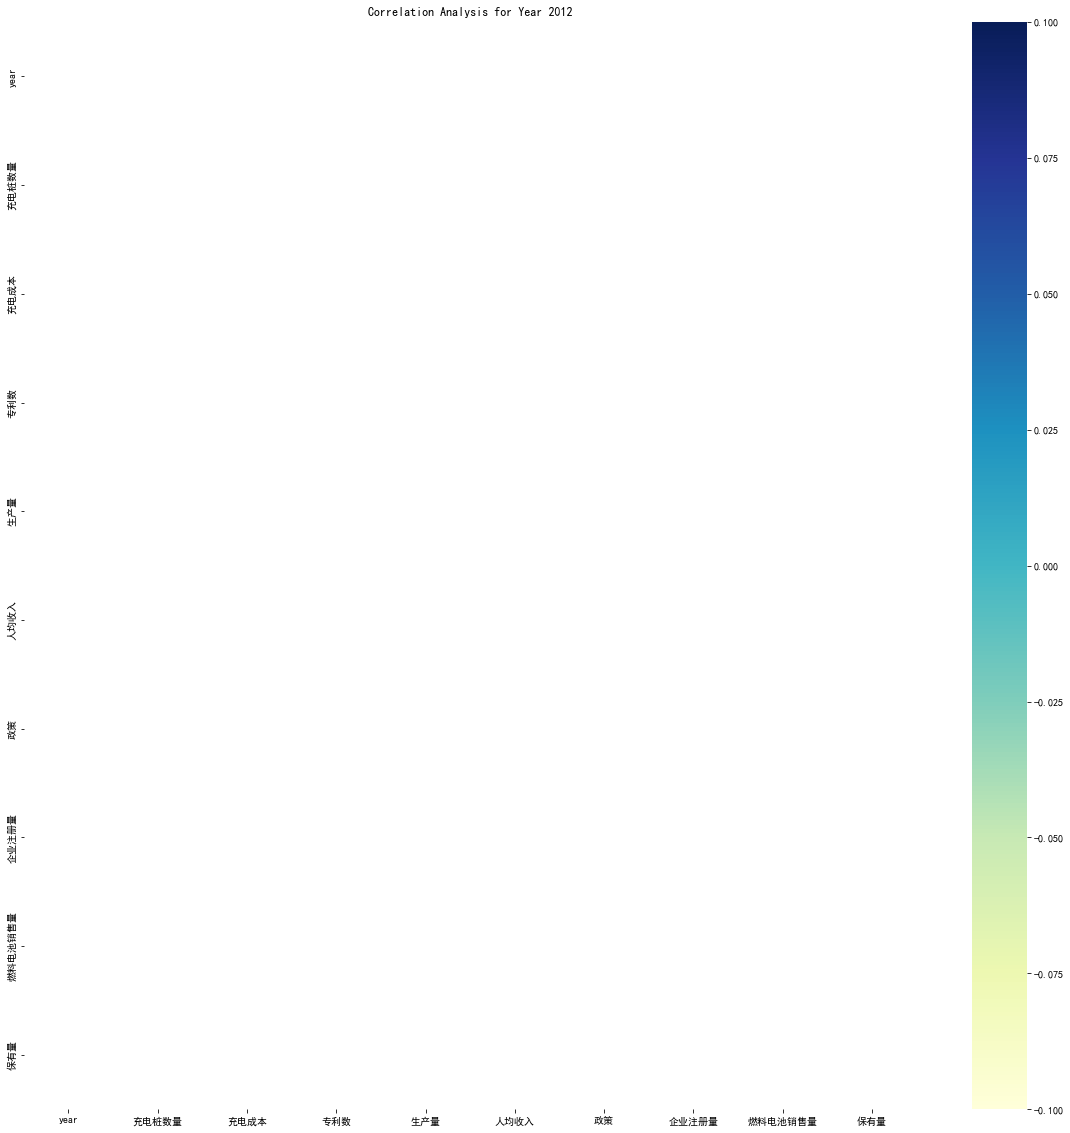

Not enough data for Year 2012. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

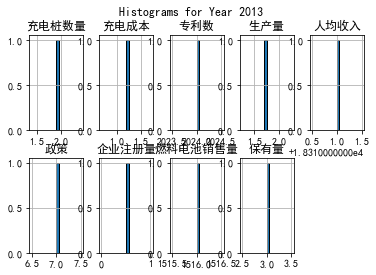

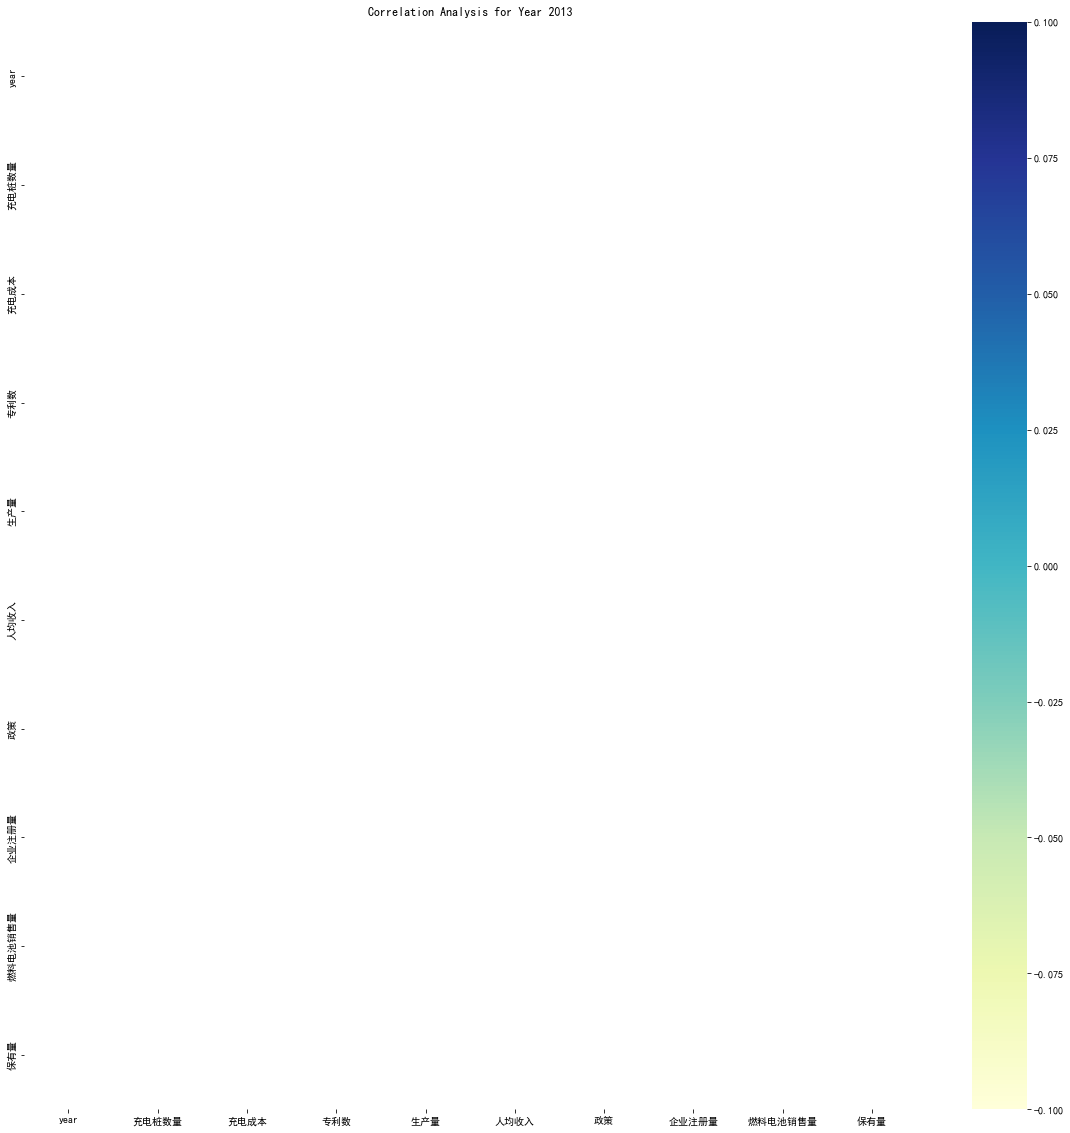

Not enough data for Year 2013. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

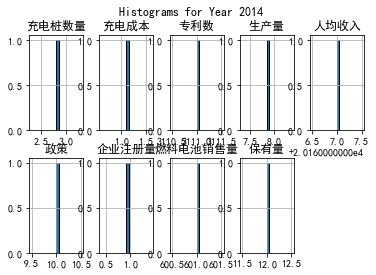

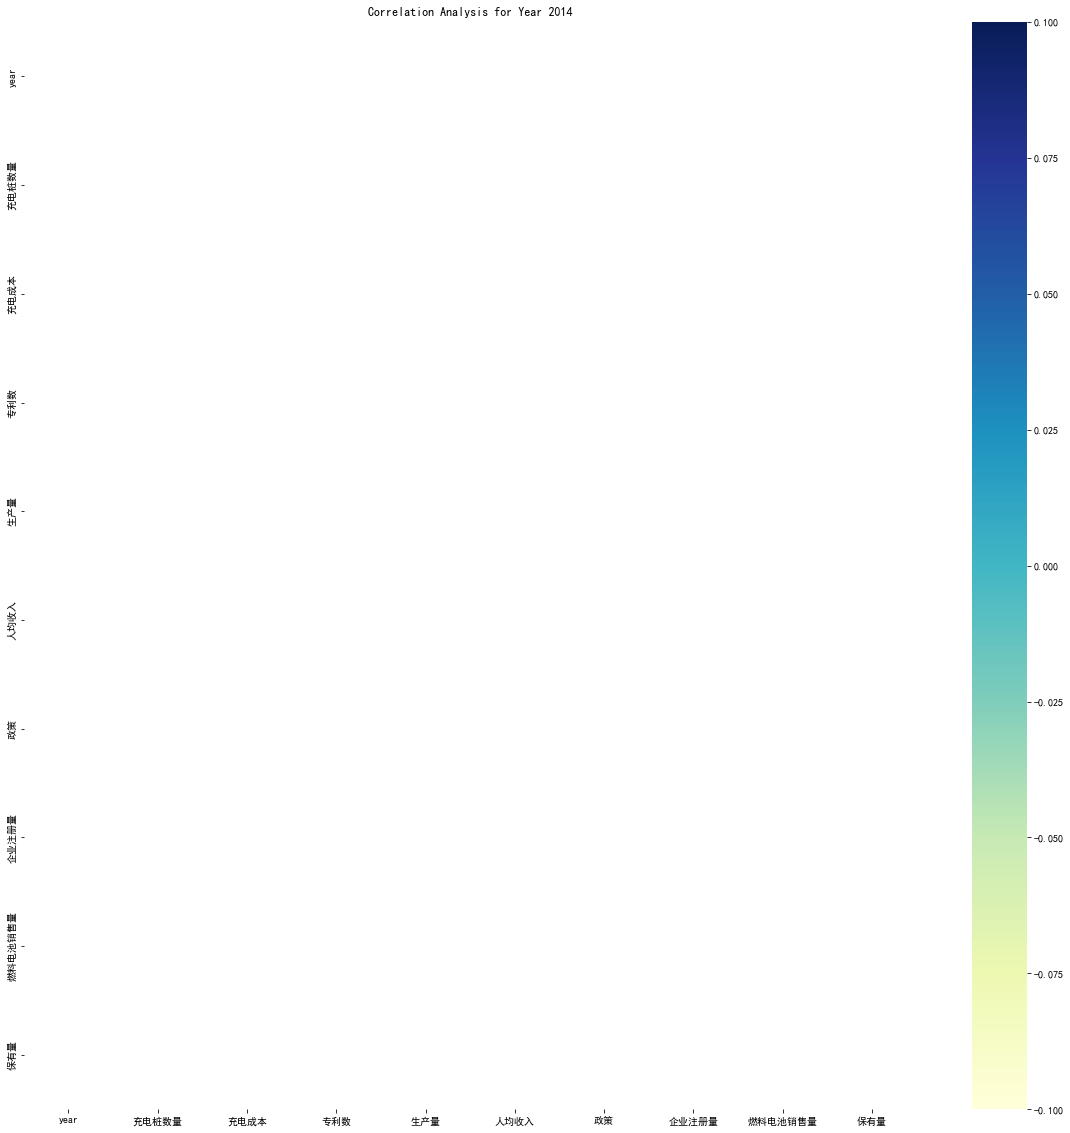

Not enough data for Year 2014. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

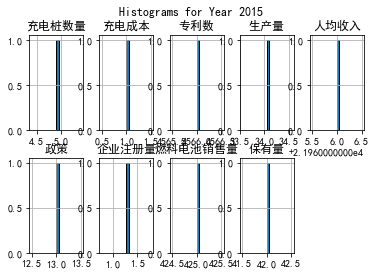

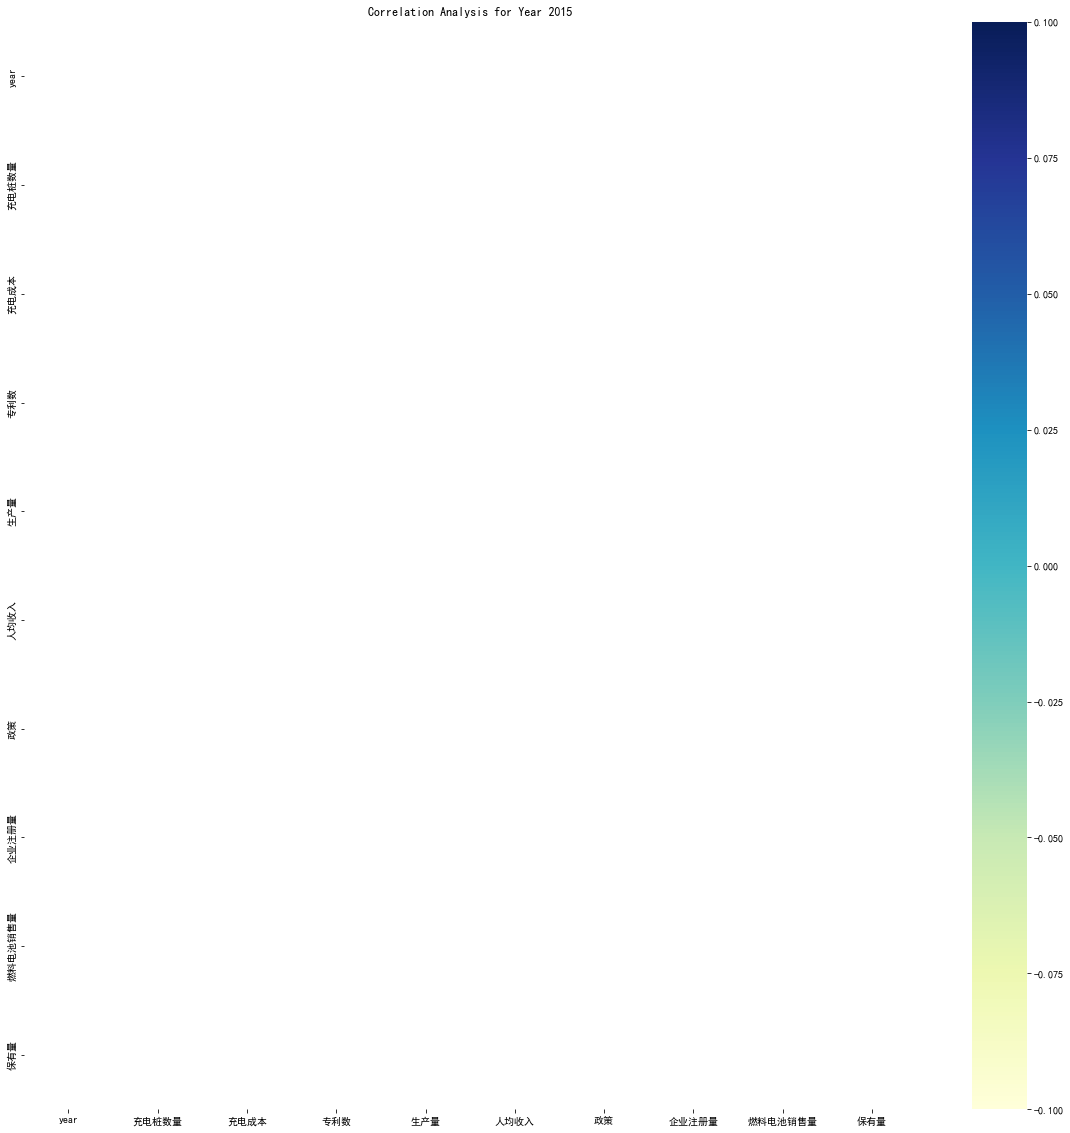

Not enough data for Year 2015. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

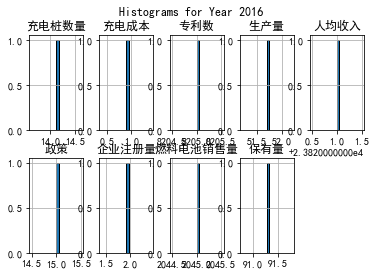

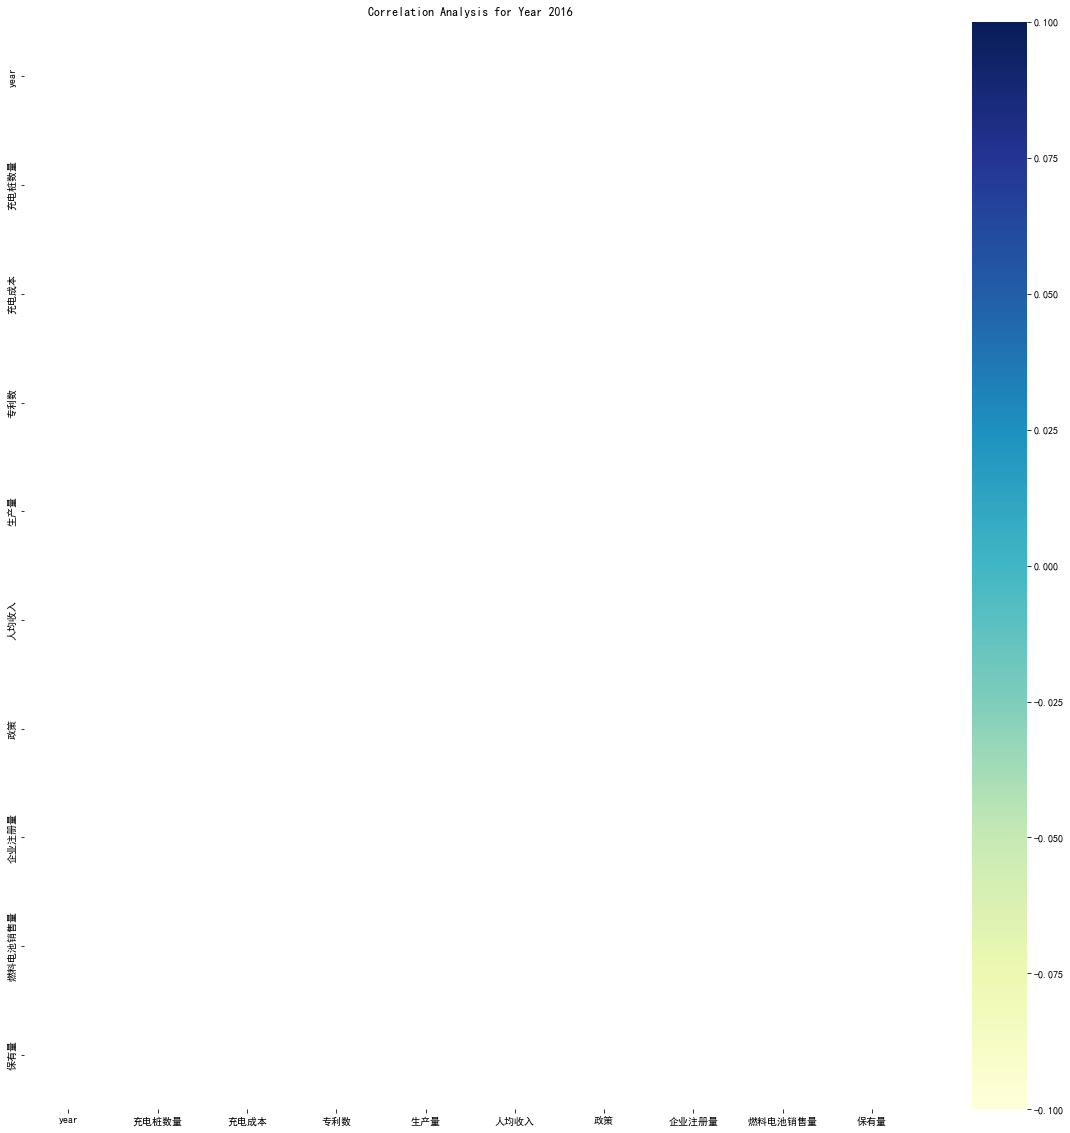

Not enough data for Year 2016. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

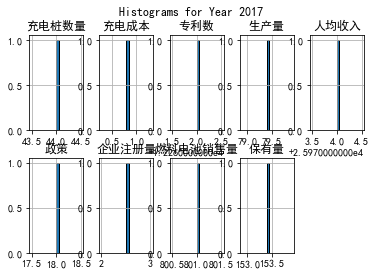

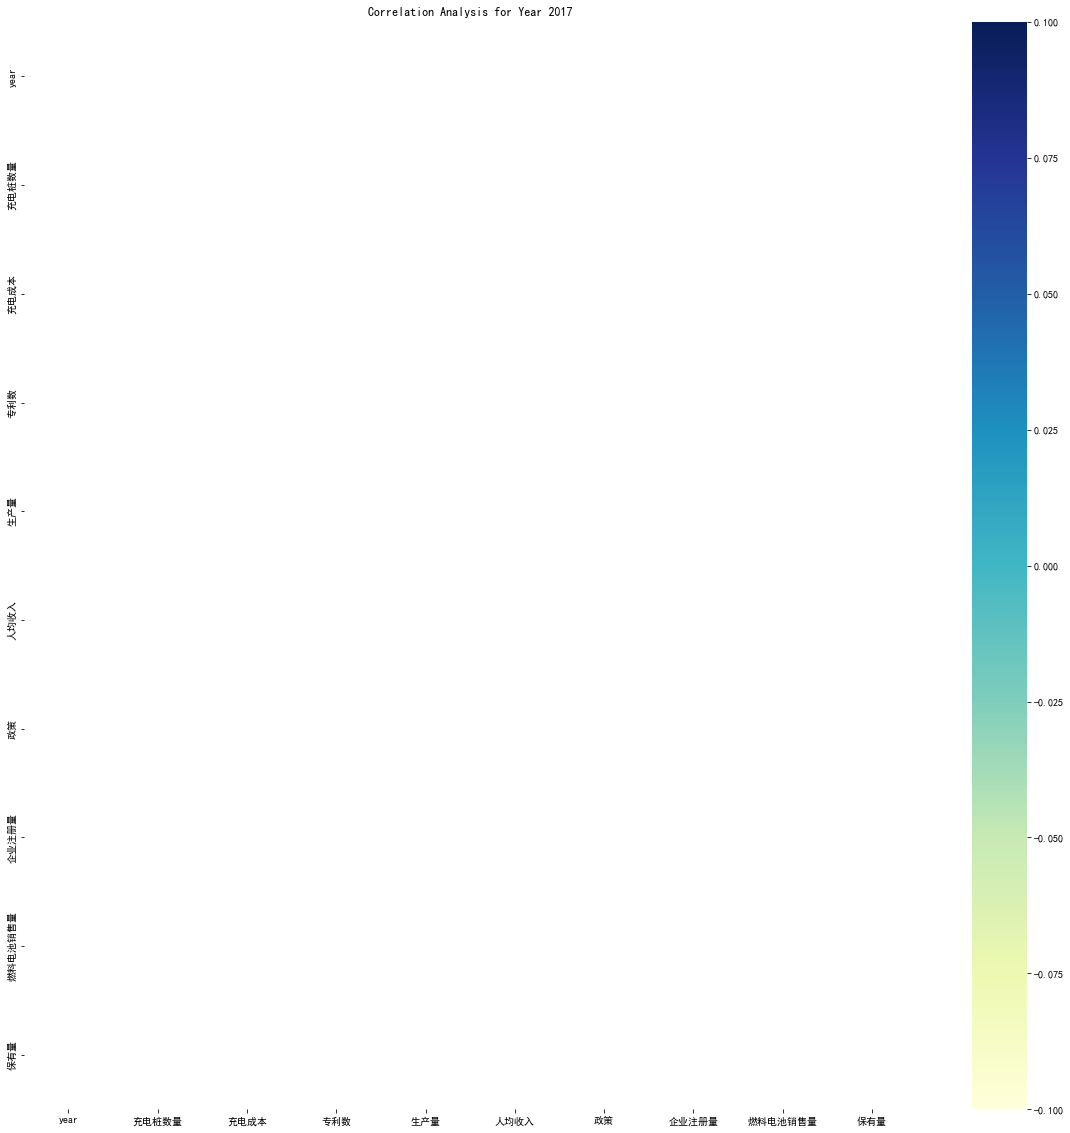

Not enough data for Year 2017. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

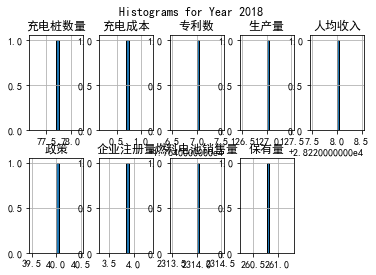

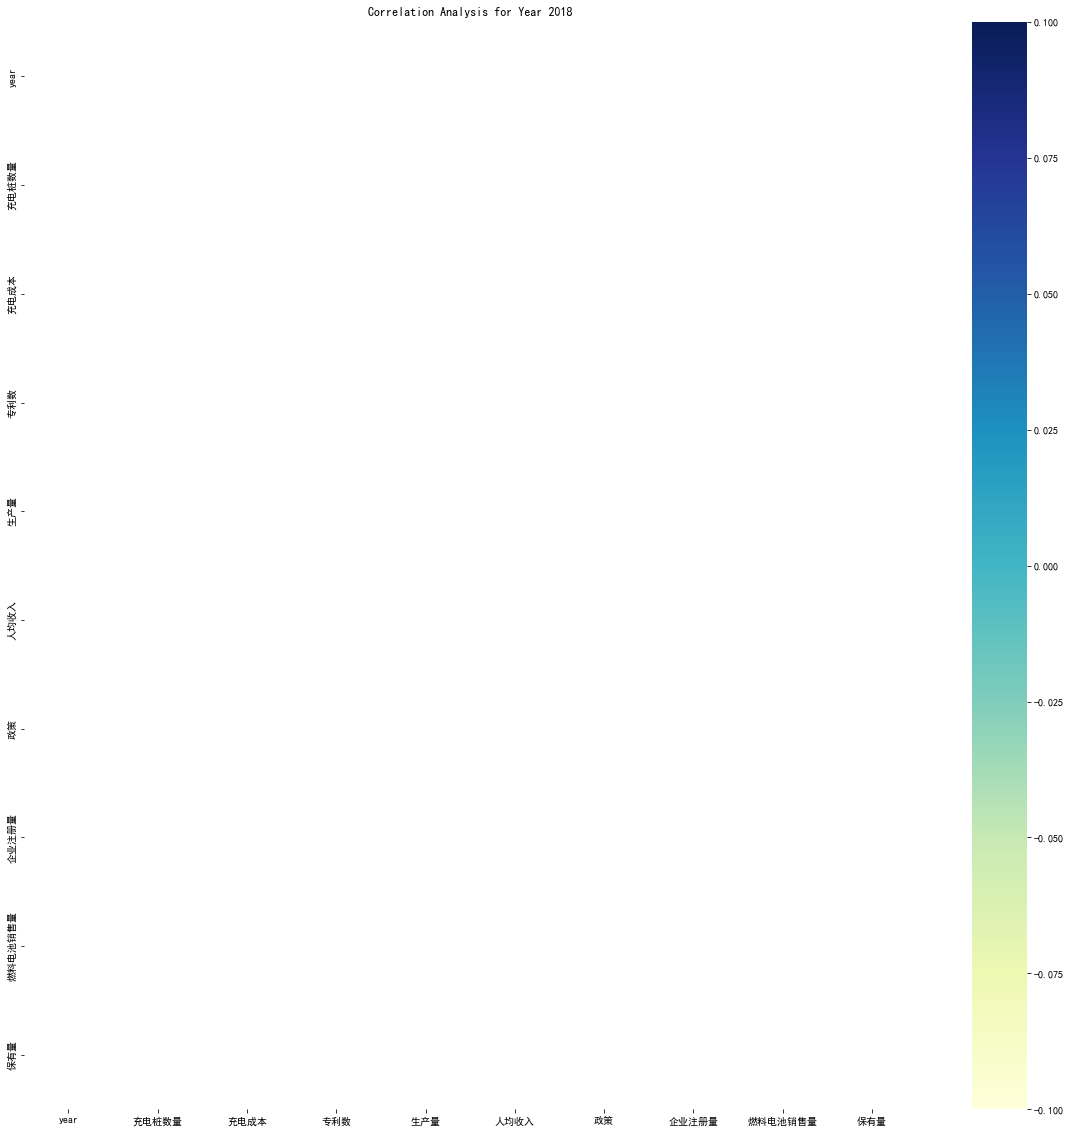

Not enough data for Year 2018. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

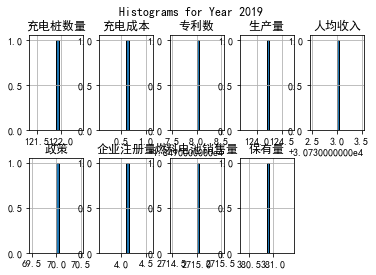

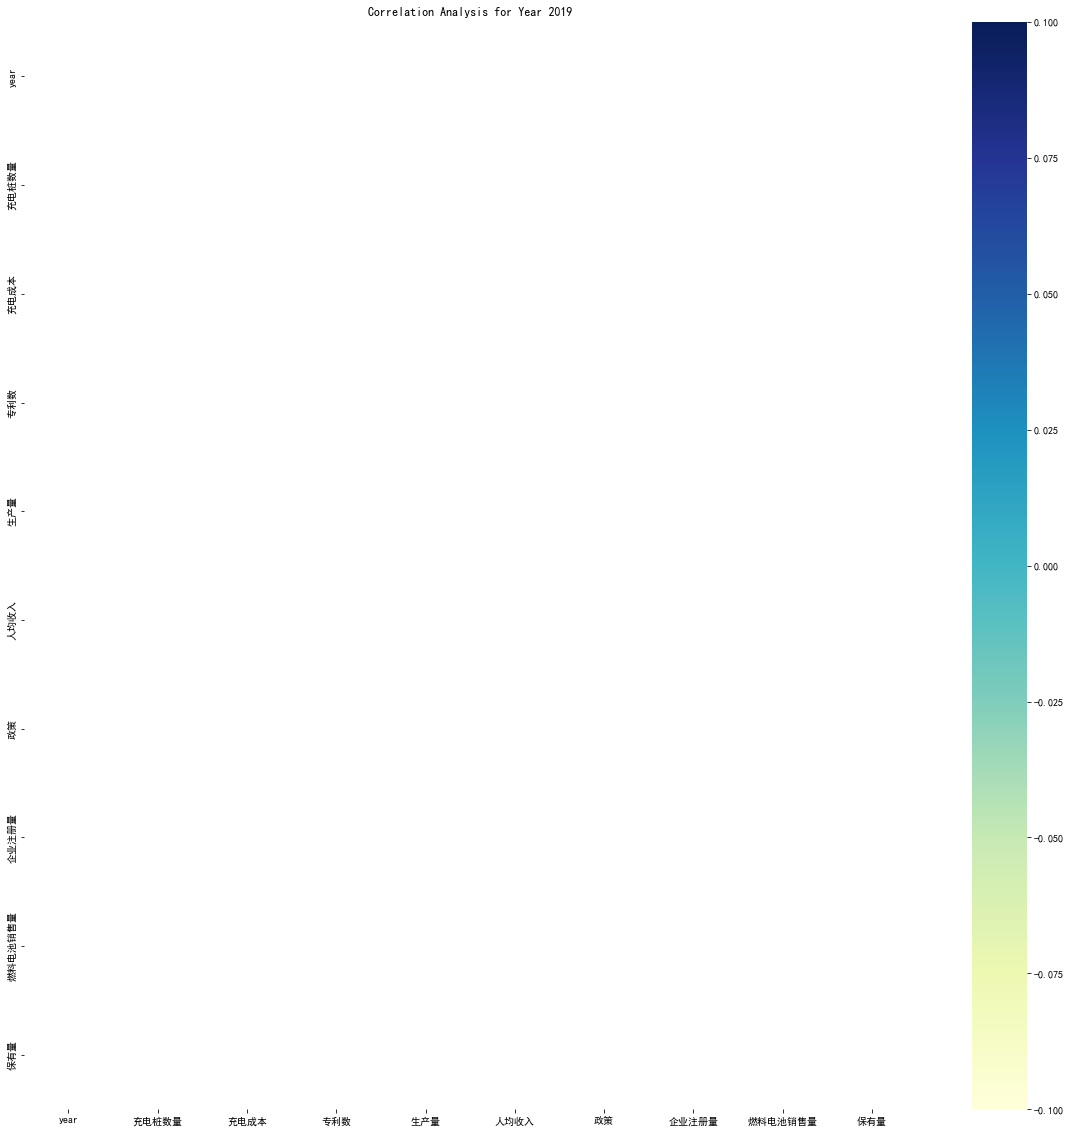

Not enough data for Year 2019. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

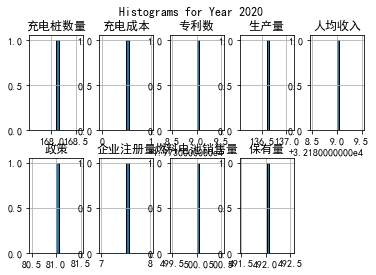

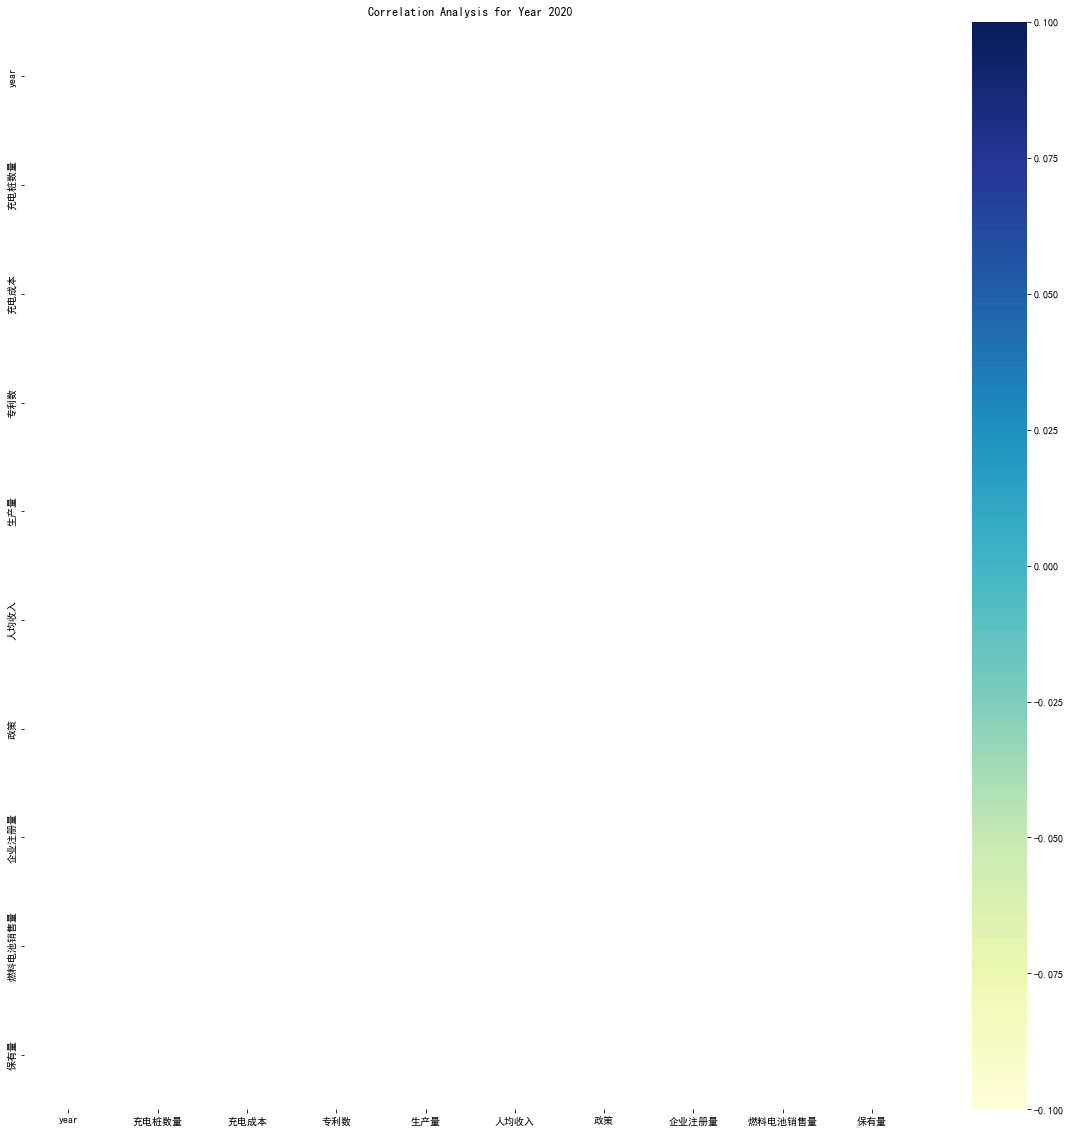

Not enough data for Year 2020. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

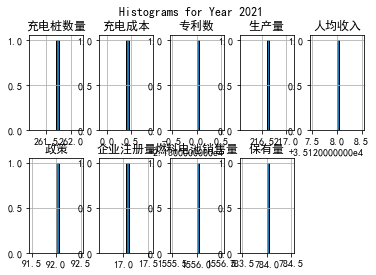

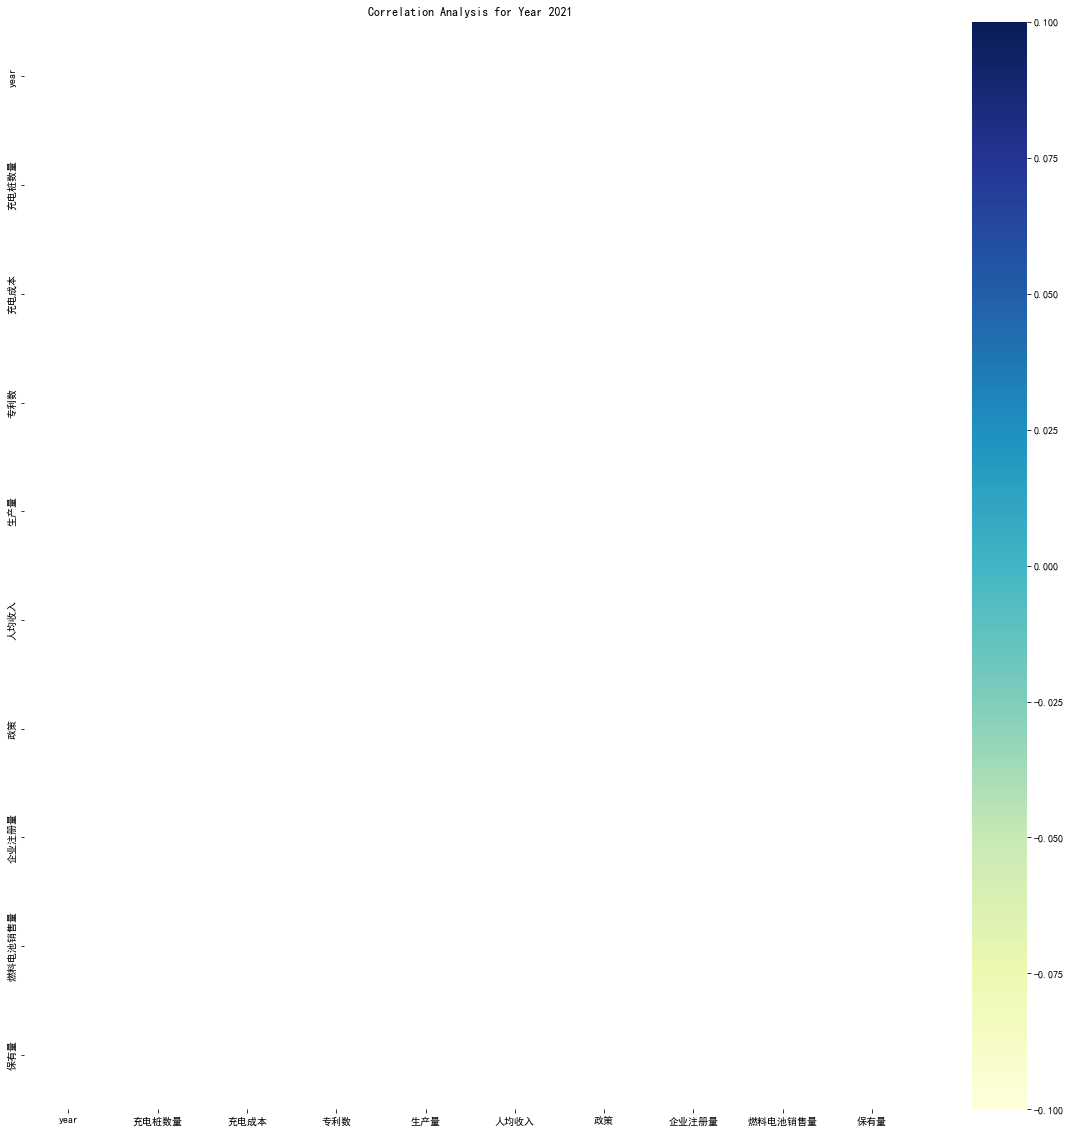

Not enough data for Year 2021. Skipping analysis.


<Figure size 1440x1440 with 0 Axes>

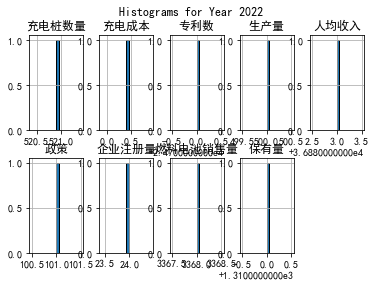

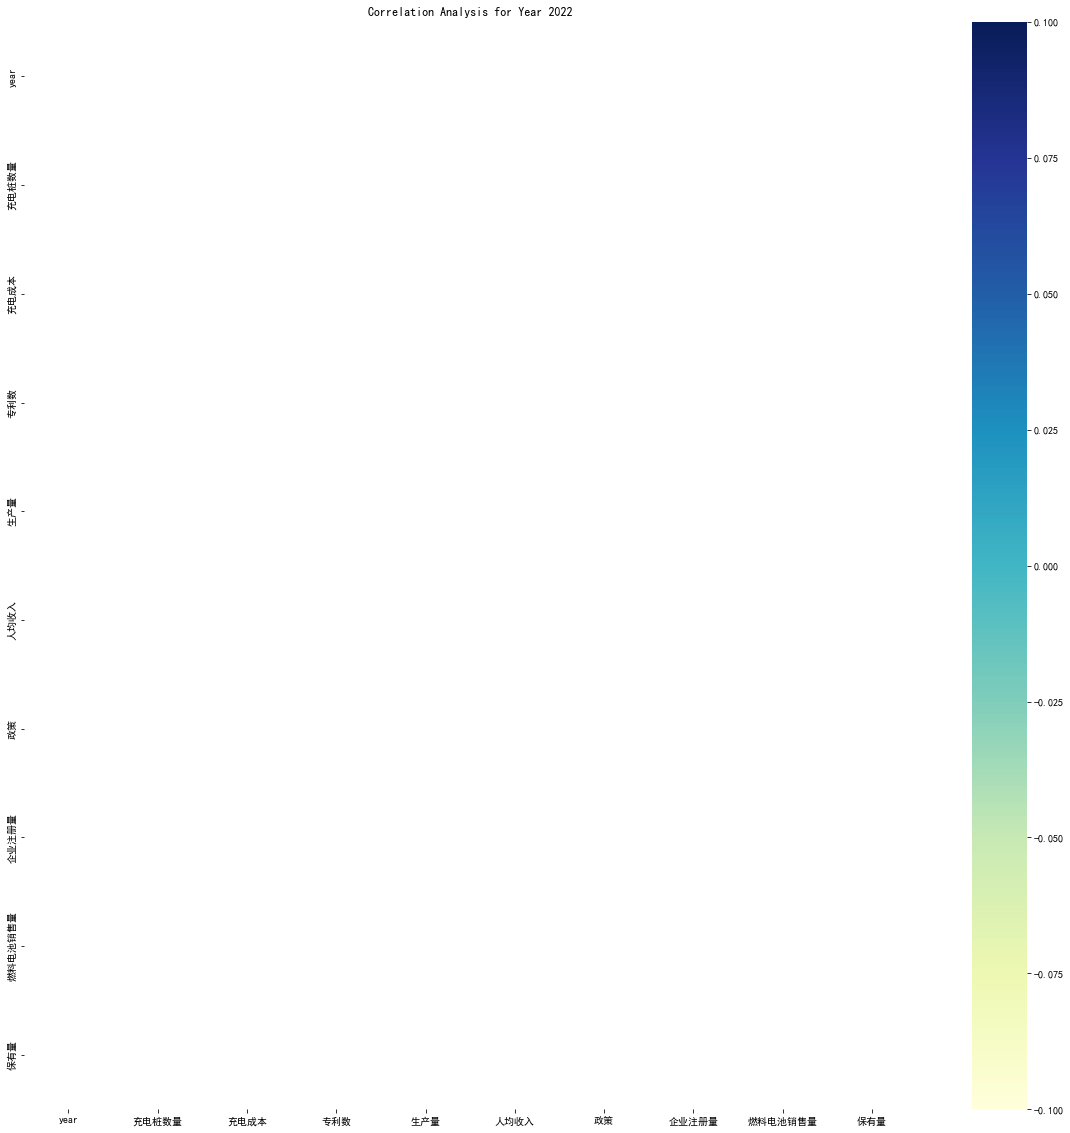

Not enough data for Year 2022. Skipping analysis.


In [320]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 导入数据
filename = 'data/ElectricCar.csv'
# 设置列名
names = ['year', '充电桩数量', '充电成本', '专利数','生产量', '人均收入', '政策','企业注册量','燃料电池销售量','保有量']
# 读取CSV文件
data = pd.read_csv(filename, names=names, skiprows=1)

# 按年份分割数据集
unique_years = data['year'].unique()

for year in unique_years:
    # 按年份过滤数据
    year_data = data[data['year'] == year]
    
    # 数据可视化
    plt.figure(figsize=(20, 20))
    year_data.iloc[:, 1:10].hist(layout=(2, 5), bins=20, edgecolor='black')
    plt.suptitle(f'Histograms for Year {year}')
    plt.show()

    # 相关性热度图-皮尔逊相关系数
    plt.figure(figsize=(20, 20))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(year_data.corr(), cmap="YlGnBu", annot=True)
    plt.title(f"Correlation Analysis for Year {year}")
    plt.show()

    # 数据准备
    if len(year_data) >= 2:  # Check if there's enough data for splitting
        X = year_data.iloc[:, 1:9].values
        Y = year_data.iloc[:, 9:].values

        # 拆分训练集和测试集
        validation_size = 0.2
        seed = 7
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

        # 标准化数据
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 创建多线性回归模型
        modelLR = LinearRegression()

        # 拟合模型
        modelLR.fit(X_train_scaled, Y_train)

        # 获取特征标签和系数
        feat_labels = year_data.columns[1:9]
        coefficients = modelLR.coef_[0]

        # 创建多线性回归模型
        model = LinearRegression()

        # 拟合模型
        res = model.fit(X_train_scaled, Y_train)

        # 在测试集上进行预测
        Y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(Y_test, Y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(Y_test, Y_pred)
        coefficients = model.coef_

        print(f'Analysis for Year {year}:')
        print(f'MSE: {mse}')
        print(f'RMSE: {rmse}')
        print(f'MAE: {mae}')
        print(f'Coefficients: {coefficients}')
        print('-' * 50)
    else:
        print(f'Not enough data for Year {year}. Skipping analysis.')
